In [ ]:
import tensorflow as tf  # Importa o TensorFlow para criação de redes neurais
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Importa ImageDataGenerator para pré-processamento de imagens
from tensorflow.keras import layers, models  # Importa layers e models para criar redes neurais
import matplotlib.pyplot as plt  # Importa Matplotlib para visualização de gráficos
import numpy as np  # Importa NumPy para manipulação de arrays e matrizes
import seaborn as sns  # Importa Seaborn para visualizações estatísticas
from sklearn.metrics import confusion_matrix, classification_report  # Importa funções de avaliação do modelo (matriz de confusão e relatório)

import os  # Importa os para interagir com o sistema de arquivos
import glob  # Importa glob para buscar arquivos com padrões específicos
from PIL import Image  # Importa Pillow (PIL) para abrir e salvar imagens

import shutil  # Importa shutil para mover ou copiar arquivos
import random  # Importa random para gerar números aleatórios


In [20]:
# Caminho para o diretório que contém as subpastas de classes (flores e vegetais)
dataset_path = r"C:\Users\bruno\OneDrive\Documentos\FIAP-BRUNIN69\REDES NEURAIS\PROJETO FLORES e VEGETAIS\FOTOS\flowers"

# Variável para armazenar o total de imagens
total_images = 0

# Dicionário para armazenar a contagem de imagens por classe
class_counts = {}

# Percorre cada item (subpasta) dentro do diretório principal
for class_name in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, class_name)  # Caminho completo da subpasta

    # Verifica se o item é realmente uma pasta (ignora arquivos soltos)
    if os.path.isdir(class_path):
        # Conta quantos arquivos .jpg, .jpeg e .png existem nessa pasta
        num_images = len(glob.glob(os.path.join(class_path, "*.jpg"))) +\
                     len(glob.glob(os.path.join(class_path, "*.jpeg"))) +\
                     len(glob.glob(os.path.join(class_path, "*.png")))

        # Armazena a contagem no dicionário com o nome da classe
        class_counts[class_name] = num_images

        # Soma ao total geral de imagens
        total_images += num_images

# Exibe o total de imagens encontradas em todas as classes
print(f"Total de imagens encontradas foi: {total_images}")

# Exibe a contagem de imagens por cada classe
print("\nImagens por classe:\n")
for class_name, count in class_counts.items():
    print(f"{class_name}: {count} imagens")

Total de imagens encontradas foi: 4317

Imagens por classe:

daisy: 764 imagens
dandelion: 1052 imagens
rose: 784 imagens
sunflower: 733 imagens
tulip: 984 imagens


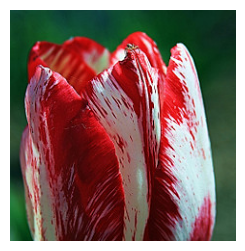

In [16]:
folder_name = os.path.join(dataset_path, "tulip")  # Define o caminho da pasta de flores "tulip"

# Verifica os arquivos .jpg, .jpeg e .png existentes na pasta "tulip"
folder_images = glob.glob(os.path.join(folder_name, "*.jpg")) +\
                glob.glob(os.path.join(folder_name, "*.jpeg")) +\
                glob.glob(os.path.join(folder_name, "*.png"))

# Verifica se encontrou imagens
if folder_images:
    img = Image.open(folder_images[500])  # Abre a imagem (arquivo) 500
    plt.figure(figsize=(3,3))  # Define o tamanho da figura (3 por 3)
    plt.imshow(img)  # Exibe a imagem
    plt.axis("off")  # Remove os eixos
    plt.show  # Mostra a imagem
else:
    print(f"Nenhuma imagem encontrada na pasta {folder_name}")  # Mensagem se nenhuma arquivo for encontrado


In [ ]:
# Caminho do dataset original
original_dataset_path = r"C:\Users\bruno\OneDrive\Documentos\FIAP-BRUNIN69\REDES NEURAIS\PROJETO FLORES e VEGETAIS\FOTOS\flowers"

# Caminho para salvar os dados divididos
output_path = r"C:\Users\bruno\OneDrive\Documentos\FIAP-BRUNIN69\REDES NEURAIS\PROJETO FLORES e VEGETAIS\FOTOS\flowers_split"

# Proporções para divisão dos dados
train_ratio = 0.8  # 80% para treino
val_ratio = 0.1    # 10% para validação
test_ratio = 0.1   # 10% para teste

# Verifica se as pastas divididas já existem
if os.path.exists(output_path) and all(os.path.exists(os.path.join(output_path, split)) for split in ["train", "validation", "test"]):
    print("Divisão de dados já realizada.\n")

    dataset_summary = {"train": {}, "validation": {}, "test": {}}  # Dicionário para resumo da divisão

    for split in ["train", "validation", "test"]:  # Percorre cada conjunto
        print(f"Pasta {split.upper()} Conjunto:")
        for class_name in os.listdir(os.path.join(output_path, split)):  # Para cada classe na pasta
            class_path = os.path.join(output_path, split, class_name)
            if os.path.isdir(class_path):
                num_images = len(os.listdir(class_path))  # Conta as imagens
                dataset_summary[split][class_name] = num_images
                print(f"{class_name}: {num_images} imagens")
        print()

else:
    print("Dividir o conjunto de imagens em Train, Validation e Test.\n")

    # Cria pastas para cada divisão e classe
    for split in ["train", "validation", "test"]:
        for class_name in os.listdir(original_dataset_path):
            os.makedirs(os.path.join(output_path, split, class_name), exist_ok=True)

    # Inicia a distribuição das imagens
    for class_name in os.listdir(original_dataset_path):  # Para cada classe
        class_path = os.path.join(original_dataset_path, class_name)
        if os.path.isdir(class_path):
            images = os.listdir(class_path)  # Lista todas as imagens da classe
            random.shuffle(images)  # Embaralha as imagens

            train_split = int(train_ratio * len(images))  # Quantidade para treino
            val_split = int(val_ratio * len(images)) + train_split  # Quantidade até validação

            for i, image in enumerate(images):  # Para cada imagem
                src_path = os.path.join(class_path, image)  # Caminho da imagem original

                if not os.path.exists(src_path):  # Verifica se o arquivo existe
                    print(f"Arquivo não encontrado: {src_path}")
                    continue

                # Define o destino da imagem conforme o índice
                if i < train_split:
                    dst_path = os.path.join(output_path, "train", class_name, image)
                elif i < val_split:
                    dst_path = os.path.join(output_path, "validation", class_name, image)
                else:
                    dst_path = os.path.join(output_path, "test", class_name, image)

                os.makedirs(os.path.dirname(dst_path), exist_ok=True)  # Garante que o diretório exista
                shutil.copy(src_path, dst_path)  # Copia a imagem para o destino

    print("Dados divididos com sucesso")  # Mensagem final

Divisão de dados já realizada.



AttributeError: 'str' object has no attribute 'bold'